In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#MODELO 2: KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("../data/processed/limpio1.csv")
df.head(1)

,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder,Nutritional Deficiencies _Biotin Deficiency,...,Medications & Treatments_Antibiotics,Medications & Treatments_Antidepressants,Medications & Treatments_Antifungal Cream,Medications & Treatments_Blood Pressure Medication,Medications & Treatments_Chemotherapy,Medications & Treatments_Heart Medication,Medications & Treatments_Immunomodulators,Medications & Treatments_No Data,Medications & Treatments_Rogaine,Medications & Treatments_Steroids
0,1,19,0,1.0,0.0,1.0,1.0,0.0,0.0,False,...,False,False,False,False,False,False,False,True,False,False


In [3]:
dfsimple = df[["Medications & Treatments_No Data","Medical Conditions_Psoriasis","Nutritional Deficiencies _Vitamin D Deficiency", "Hair Loss"]]
dfsimple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Medications & Treatments_No Data                999 non-null    bool 
 1   Medical Conditions_Psoriasis                    999 non-null    bool 
 2   Nutritional Deficiencies _Vitamin D Deficiency  999 non-null    bool 
 3   Hair Loss                                       999 non-null    int64
dtypes: bool(3), int64(1)
memory usage: 10.9 KB


In [46]:
X = df[["Medications & Treatments_No Data","Medical Conditions_Psoriasis","Nutritional Deficiencies _Vitamin D Deficiency"]]
y = df["Hair Loss"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)


In [48]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
pred = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, pred))
print("precision: ", precision_score(y_test, pred))
print("Recall: ", recall_score(y_test, pred))

Accuracy:  0.485
precision:  0.4692737430167598
Recall:  0.9130434782608695


<Axes: >

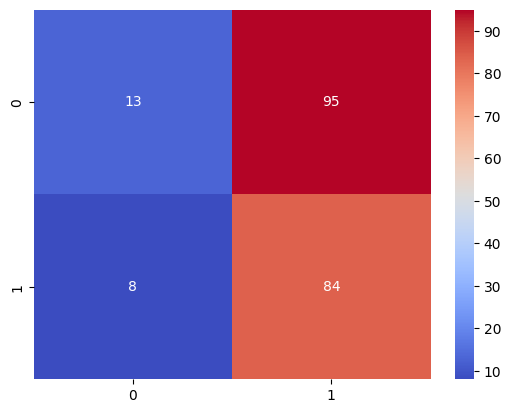

In [50]:
sns.heatmap(confusion_matrix(y_test, pred), cmap = "coolwarm",annot= True)

In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.12      0.20       108
           1       0.47      0.91      0.62        92

    accuracy                           0.48       200
   macro avg       0.54      0.52      0.41       200
weighted avg       0.55      0.48      0.39       200

